# Pyber Ride Sharing
----

### Analysis
* Riders from Urban areas generate the highest amount of rides and net income.
* Riders from Rural areas have the highest average fare but have the lowest volume of rides.
* Nearly 81% of drivers work in Urban areas although they only account for 62.7% of total ride volume. There may be more opportunities for drivers in rural and suburban areas.

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)




In [3]:
# Combine the data into a single dataset
merge_table = pd.merge(city_df, ride_df, on = "city")

# Display the data table for preview
merge_table = merge_table[["city", "date", "fare", "ride_id", "driver_count", "type"]]

merge_table.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

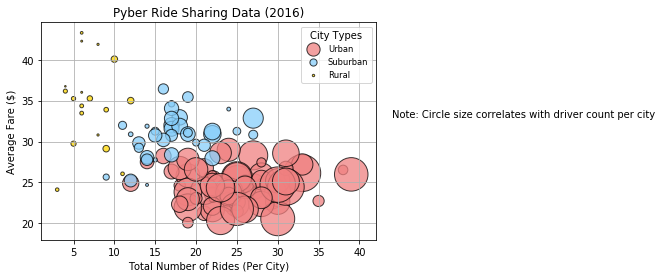

In [22]:
# Obtain the x and y coordinates for each of the three city types

type_df = merge_table.set_index("type")

urban_df = type_df.loc[['Urban'],["fare", "city", "driver_count"]]
suburban_df = type_df.loc[['Suburban'],["fare", "city", "driver_count"]]
rural_df = type_df.loc[['Rural'],["fare", "city", "driver_count"]]

grouped_urban = urban_df.groupby(["city"])
urban_count = grouped_urban.count()
urban_fare = grouped_urban["fare"].mean()
urban_drivers = grouped_urban["driver_count"].sum()
urban_count["avg fare"] = urban_fare
urban_count["driver_count"] = urban_drivers

grouped_suburban = suburban_df.groupby(["city"])
suburban_count = grouped_suburban.count()
suburban_fare = grouped_suburban["fare"].mean()
suburban_drivers = grouped_suburban["driver_count"].sum()
suburban_count["avg fare"] = suburban_fare
suburban_count["driver_count"] = suburban_drivers

grouped_rural = rural_df.groupby(["city"])
rural_count = grouped_rural.count()
rural_fare = grouped_rural["fare"].mean()
rural_drivers = grouped_rural["driver_count"].sum()
rural_count["avg fare"] = rural_fare
rural_count["driver_count"] = rural_drivers

city_types = list(sorted(set(merge_table['type']),reverse = True))



# urban_df.head()
# suburban_df.head
# rural_df.head()
# suburban_count.head()
# grouped_urban.head()


# Build the scatter plots for each city types

plt.scatter(urban_count["fare"], urban_count["avg fare"], marker="o", facecolors="lightcoral", 
            edgecolors="black", s= urban_count["driver_count"]*.6, alpha=.75)
plt.scatter(suburban_count["fare"], suburban_count["avg fare"], marker="o", 
            facecolors="lightskyblue", edgecolors="black", s= suburban_count["driver_count"]*.6,
            alpha=0.75)
plt.scatter(rural_count["fare"], rural_count["avg fare"], marker="o", facecolors="gold", 
            edgecolors="black", s = rural_count["driver_count"]*.6, alpha=0.75)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.xlim(xmax = 42)
plt.ylim(ymin = 18)

plt.grid()
plt.tight_layout

# Create a legend
plt.legend(labels = city_types, title = 'City Types', fontsize = 'small', markerscale= .5)

# Incorporate a text label regarding circle size
plt.annotate("Note: Circle size correlates with driver count per city", size=10, xy = (10,20), xytext=(44, 33))
plt.show()

# Save Figure
plt.savefig("Pyber_Scatterplot.png")

## Total Fares by City Type

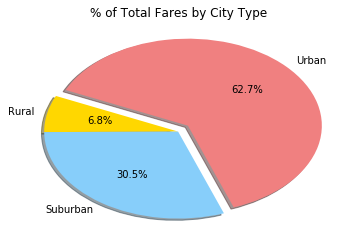

In [7]:
# Calculate Type Percents
total_fare_sum = merge_table["fare"].sum()
urban_fare_sum = round(urban_df["fare"].sum(),2)
suburban_fare_sum = round(suburban_df["fare"].sum(),2)
rural_fare_sum = round(rural_df["fare"].sum(),2)

urban_fare_percent = round((urban_fare_sum/total_fare_sum)*100,2)
suburban_fare_percent = round((suburban_fare_sum/total_fare_sum)*100,2)
rural_fare_percent = round((rural_fare_sum/total_fare_sum)*100,2)

pyber_fare_percents = [urban_fare_percent, rural_fare_percent, suburban_fare_percent]

# rural_fare_percent
# total_fare_sum
# urban_fare_sum

# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = [0.1, 0, 0]

plt.pie(pyber_fare_percents, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 290)
plt.title("% of Total Fares by City Type")
plt.show()
# Save Figure
plt.savefig("Pyber_TotalFares_Pie.png")

## Total Rides by City Type

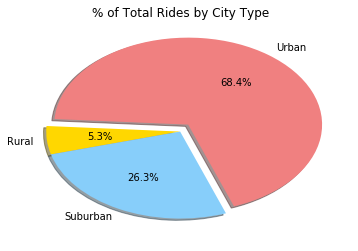

In [8]:
# Calculate Ride Percents
total_ride_count = merge_table["city"].count()
urban_ride_count = urban_df["city"].count()
suburban_ride_count = suburban_df["city"].count()
rural_ride_count = rural_df["city"].count()

urban_ride_percent = round((urban_ride_count/total_ride_count)*100,2)
suburban_ride_percent = round((suburban_ride_count/total_ride_count)*100,2)
rural_ride_percent = round((rural_ride_count/total_ride_count)*100,2)

# Build Pie Chart
pyber_ride_count = [urban_ride_percent, rural_ride_percent, suburban_ride_percent]
labels = ["Urban", "Rural", "Suburban"]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = [.1, 0, 0]

plt.pie(pyber_ride_count, explode = explode, colors = colors, labels=labels, shadow = True, autopct = '%1.1f%%', startangle = 290)
plt.title("% of Total Rides by City Type")
plt.show()

# Save Figure
plt.savefig("Pyber_TotalRides_Pie.png")


## Total Drivers by City Type

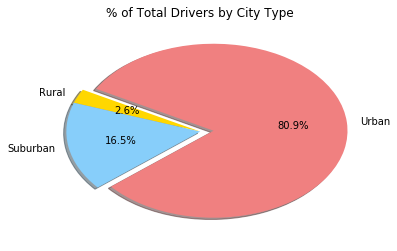

In [9]:
# Calculate Driver Percents
total_driver_count = merge_table.drop_duplicates("city")
total_driver_count = total_driver_count["driver_count"].sum()

urban_df = urban_df.drop_duplicates("city")
urban_driver_count = urban_df["driver_count"].sum()

suburban_df = suburban_df.drop_duplicates("city")
suburban_driver_count = suburban_df["driver_count"].sum()

rural_df = rural_df.drop_duplicates("city")
rural_driver_count = rural_df["driver_count"].sum()

urban_driver_percent = round((urban_driver_count/total_driver_count)*100,2)
suburban_driver_percent = round((suburban_driver_count/total_driver_count)*100,2)
rural_driver_percent = round((rural_driver_count/total_driver_count)*100,2)

# Build Pie Charts

pyber_driver_count = [urban_driver_percent, rural_driver_percent, suburban_driver_percent]
labels = ["Urban", "Rural", "Suburban"]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = [.1, 0, 0]

plt.pie(pyber_driver_count, explode = explode, colors = colors, labels=labels, shadow = True, autopct = '%1.1f%%', startangle = 220)
plt.title("% of Total Drivers by City Type")
plt.show()

# Save Figure

plt.savefig("Pyber_DriverCount_Pie.png")
